# **TEXT AUTO ENCODER USING MULTILAYER PERCEPTRON**

In [ ]:
from keras.datasets import imdb
import numpy as np


In [ ]:
max_features= 500 # NUMBER OF WORD OR VOCABULARY SIZE
(X_tr, y_tr), (X_te, y_te) =  imdb.load_data(num_words=max_features)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
X_train = X_tr[:500]
y_train = y_tr[:500]
X_test = X_te[:500]
y_test = y_te[:500]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(500,)
(500,)
(500,)
(500,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
print("Categories:", np.unique(y_train))
print("Number of unique words:", len(np.unique(np.hstack(X_train))))

Categories: [0 1]
Number of unique words: 498


In [ ]:
length = [len(i) for i in X_train]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 257.8
Standard Deviation: 196


In [ ]:
print("Label:", y_train[0])
print(X_train[0])

Label: 1
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


##**Pre-processing**

In [ ]:
# Used for pre-processing data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd
from nltk import pos_tag
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocessing(text):
    #splits the word and checks each character to see if it contains any standard punctuations, 
    #if so it will be replaced with a blank or else it just don’t replace with blank
    text2 = " ".join("".join([" " if ch in string.punctuation else ch for ch in text]).split())
    
    #tokenizes the sentences into words based on whitespaces and puts them together as a list for applying further steps
    tokens = [word for sent in nltk.sent_tokenize(text2) for word in nltk.word_tokenize(sent)]
    
    #Converting all the cases (upper, lower and proper) into lower case reduces duplicates in corpus
    tokens = [word.lower() for word in tokens]
    
    #Stop words are the words that do not carry much of weight in understanding the sentence; 
    #they are used for connecting words and so on. We have removed them with the following line of code
    stopwds = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwds]
    
    #Stemming applied on the words using Porter stemmer which stems the extra suffixes from the words
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    #POS tagging is a prerequisite for lemmatization, based on whether the word 
    #is noun or verb or and so on. it will reduce it to the root word
    tagged_corpus = pos_tag(tokens)

    Noun_tags = ['NN','NNP','NNPS','NNS']
    Verb_tags = ['VB','VBD','VBG','VBN','VBP','VBZ']
    lemmatizer = WordNetLemmatizer()

    #  If the tag for any word falls under the respective noun or verb tags category, 
    #  n or v will be applied accordingly in lemmatize function
    def prat_lemmatize(token,tag):
        if tag in Noun_tags:
            return lemmatizer.lemmatize(token,'n')

        elif tag in Verb_tags:
            return lemmatizer.lemmatize(token,'v')
        else:
            return lemmatizer.lemmatize(token,'n')
    
    #we need to join it back to form stings and the following function performs the same
    pre_proc_text =   " ".join([prat_lemmatize(token,tag) for token,tag in tagged_corpus])

    return pre_proc_text

###**PREPROCESSING ON TRAIN AND TEST DATA**

In [ ]:
# A dictionary mapping words to an integer index
vocabulary = imdb.get_word_index()

index = dict([(value, key) for (key, value) in vocabulary.items()])

In [ ]:
'''converts encoded text to human readable form.
    each integer in the text is looked up in the index, and 
    replaced by the corresponding word.
'''
X_train = [' '.join([index.get(i, '?') for i in x]) for x in X_train]
X_test = [' '.join([index.get(i, '?') for i in x]) for x in X_test]

In [ ]:
X_train_preprocessed = []
for i in X_train:
    X_train_preprocessed.append(preprocessing(i))

X_test_preprocessed = []
for i in X_test:
    X_test_preprocessed.append(preprocessing(i))
    

In [ ]:
X_train_preprocessed[0]

'becom lot anyon never heart show year everi never go help moment everi movi sever enough film unfortun get movi movi stori wonder see charact heart one see anyon br histori name half br two mean 1 thought script histori heart real one bit two script act watch film want'

In [ ]:
X_test_preprocessed[0]

'hollywood br get bore ever close one famili turn three part anoth probabl world begin'

### **BUILDING TF-IDF vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from keras.preprocessing.sequence import pad_sequences



vectorizer = TfidfVectorizer(max_features= max_features)
vectorizer.fit(X_train_preprocessed) 

X_train_2 = vectorizer.transform(X_train_preprocessed).todense()

X_test_2 = vectorizer.transform(X_test_preprocessed).todense()

In [ ]:
np.set_printoptions(threshold=np.inf) # to prevent truncation of output result
print(X_train_2[0][:20])

[[0.         0.         0.         0.10493867 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26324204 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.12079145 0.         0.
  0.         0.         0.         0.         0.13079788 0.
  0.         0.         0.         0.         0.08302396 0.
  0.         0.         0.         0.         0.         0.
  0.07559172 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.11387386 0.         0.         0.         0.
  0.         0.         0.22165147 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

### **DEFINE MODEL**

In [ ]:
# total_reviews = X_train + X_test
# max_length = max([len(s.split()) for s in total_reviews])

In [ ]:
# Deep Learning modules

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from keras.layers.embeddings import Embedding

In [ ]:
import tensorflow as tf

The Embedding layer requires the specification of the vocabulary size (vocab_size), the size of the real-valued vector space EMBEDDING_DIM = 100, and the maximum length of input documents max_length .

In [ ]:
embedding_dim = 200
max_length = 100
print('Build model...')
model = Sequential()
embedding_layer = Embedding(max_features, embedding_dim)

model.add(embedding_layer)
#model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

Build model...


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         100000    
_________________________________________________________________
dense (Dense)                (None, None, 4096)        823296    
_________________________________________________________________
dense_1 (Dense)              (None, None, 2048)        8390656   
_________________________________________________________________
dense_2 (Dense)              (None, None, 1024)        2098176   
_________________________________________________________________
dense_3 (Dense)              (None, None, 2048)        2099200   
_________________________________________________________________
dense_4 (Dense)              (None, None, 4096)        8392704   
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           4

# Training Model

In [ ]:
print('Shape of X_train_2:', X_train_2.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_2:', X_test_2.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_2: (500, 320)
Shape of y_train: (500,)
Shape of X_test_2: (500, 320)
Shape of y_test: (500,)


Finally training the classification model on train and validation test set, we get improvement in accuracy with each epoch run.

In [ ]:
print('Train...')

history = model.fit(X_train_2, y_train, batch_size = 512, epochs = 3, validation_data=(X_test_2, y_test))

Train...
Epoch 1/3
1/1 [==============================] - 270s 270s/step - loss: 0.6931 - accuracy: 0.5000 - mse: 0.2500 - val_loss: 0.6924 - val_accuracy: 0.5240 - val_mse: 0.2496
Epoch 2/3
1/1 [==============================] - 269s 269s/step - loss: 0.6933 - accuracy: 0.5000 - mse: 0.2501 - val_loss: 0.6934 - val_accuracy: 0.4760 - val_mse: 0.2501
Epoch 3/3
1/1 [==============================] - 268s 268s/step - loss: 0.6932 - accuracy: 0.5000 - mse: 0.2500 - val_loss: 0.6933 - val_accuracy: 0.4760 - val_mse: 0.2501


### **MODEL EVALUATION**

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test_2, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 47.60%


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         100000    
_________________________________________________________________
dense (Dense)                (None, None, 4096)        823296    
_________________________________________________________________
dense_1 (Dense)              (None, None, 2048)        8390656   
_________________________________________________________________
dense_2 (Dense)              (None, None, 1024)        2098176   
_________________________________________________________________
dense_3 (Dense)              (None, None, 2048)        2099200   
_________________________________________________________________
dense_4 (Dense)              (None, None, 4096)        8392704   
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           4

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

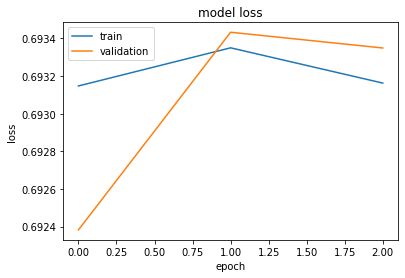

In [ ]:
plotLosses(history)

In [ ]:
print(model.metrics_names)
print(scores)

['loss', 'accuracy', 'mse']
[0.6933488249778748, 0.47600001096725464, 0.2501009404659271]


In [ ]:
y_test_pred = model.predict(X_test_2)

###**COSINE DISTANCE**

In [ ]:
y_pred = y_test_pred.flatten()

In [ ]:
X = X_test_2.flatten()

In [ ]:
from scipy.spatial.distance import cosine

cos_distance = cosine(X, y_pred)

In [ ]:
cos_distance

0.7134921030465431